In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

!wget $data

--2022-09-19 23:43:52--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  1.78MB/s    in 0.8s    

2022-09-19 23:43:54 (1.78 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
len(df.index)

20640

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [36]:
label = 'median_house_value'
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

### EDA

In [37]:
for col in features:
    print('Feature: ', col)
    print('1st 10 Unique samples: ', df[col].unique()[:10])
    print('Unique count: ',df[col].nunique())
    print('Null count', df[col].isnull().sum())
    print('=================================')

Feature:  latitude
1st 10 Unique samples:  [37.88 37.86 37.85 37.84 37.83 37.82 37.81 37.8  37.79 37.77]
Unique count:  862
Null count 0
Feature:  longitude
1st 10 Unique samples:  [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21]
Unique count:  844
Null count 0
Feature:  housing_median_age
1st 10 Unique samples:  [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.]
Unique count:  52
Null count 0
Feature:  total_rooms
1st 10 Unique samples:  [ 880. 7099. 1467. 1274. 1627.  919. 2535. 3104. 2555. 3549.]
Unique count:  5926
Null count 0
Feature:  total_bedrooms
1st 10 Unique samples:  [ 129. 1106.  190.  235.  280.  213.  489.  687.  665.  707.]
Unique count:  1923
Null count 207
Feature:  population
1st 10 Unique samples:  [ 322. 2401.  496.  558.  565.  413. 1094. 1157. 1206. 1551.]
Unique count:  3888
Null count 0
Feature:  households
1st 10 Unique samples:  [ 126. 1138.  177.  219.  259.  193.  514.  647.  595.  714.]
Unique count:  1815
Null count 0
Feature:  me

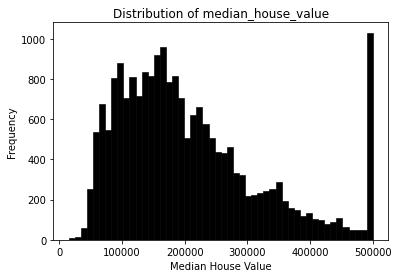

In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(df[label][df[label] < 1000000], bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Distribution of median_house_value')

plt.show()

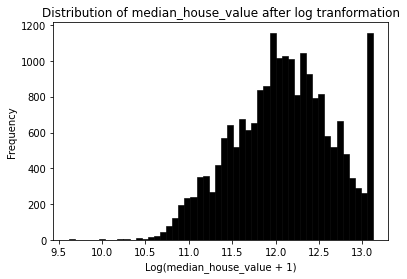

In [13]:
log_median_house_value = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_median_house_value, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(median_house_value + 1)')
plt.title('Distribution of median_house_value after log tranformation')

plt.show()

### Observation from plot
* the variable `median_house_value` has a long tail.

#### Question 1
* Find a feature with missing values. How many missing values does it have?

In [38]:
df[features].isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

#### Question 2
* What's the median (50% percentile) for variable `'population'`?

In [39]:
df['population'].median()

1166.0

#### Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value (`'median_house_value'`) is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the $np.log1p()$ function.

In [40]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [41]:
y_train_orig = df_train[label].values
y_val_orig = df_val[label].values
y_test_orig = df_test[label].values

y_train = np.log1p(df_train[label].values)
y_val = np.log1p(df_val[label].values)
y_test = np.log1p(df_test[label].values)

del df_train[label]
del df_val[label]
del df_test[label]

#### Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using $round(score, 2)$

Which option gives better RMSE?

In [50]:
def prepare_base_X(df, op=0):
    df_num = df[features]
    if op == 0:
        df_num = df_num.fillna(0)
    else:
        avg = df_train['total_bedrooms'].mean()
        df_num = df_num.fillna(avg)
    X = df_num.values
    return X

In [30]:
def train_base_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [44]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [51]:
## option 1 - filling the missing values with 0
X_train = prepare_base_X(df_train)
w_0, w = train_base_lin_reg(X_train, y_train)

X_val = prepare_base_X(df_val)
y_pred = w_0 + X_val.dot(w)


score = round(rmse(y_val, y_pred), 2)
score

0.33

In [52]:
## option 2 - filling the missing values with mean
X_train = prepare_base_X(df_train, op=1)
w_0, w = train_base_lin_reg(X_train, y_train)

X_val = prepare_base_X(df_val)
y_pred = w_0 + X_val.dot(w)


score = round(rmse(y_val, y_pred), 2)
score

0.33

#### Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

If there are multiple options, select the smallest r.


In [56]:
def train_reg_lin_reg(X, y, r = 0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [61]:
training_r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
scores = []

In [62]:
for r in training_r:
    X_train = prepare_base_X(df_train)
    w_0, w = train_reg_lin_reg(X_train, y_train, r=r)

    X_val = prepare_base_X(df_val)
    y_pred = w_0 + X_val.dot(w)


    score = round(rmse(y_val, y_pred), 2)
    scores.append(score)

scores

[0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34]

### Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [76]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores_seeds = []

In [77]:
for s in seeds:
    np.random.seed(int(s))

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled_s = df.iloc[idx]

    df_train_s = df_shuffled_s.iloc[:n_train].copy()
    df_val_s = df_shuffled_s.iloc[n_train:n_train+n_val].copy()
    df_test_s = df_shuffled_s.iloc[n_train+n_val:].copy()

    y_train_s = np.log1p(df_train_s[label].values)
    y_val_s = np.log1p(df_val_s[label].values)
    y_test_s = np.log1p(df_test_s[label].values)

    del df_train_s[label]
    del df_val_s[label]
    del df_test_s[label]

    X_train_s = prepare_base_X(df_train_s)
    w_0, w = train_reg_lin_reg(X_train_s, y_train_s, r=r)

    X_val_s = prepare_base_X(df_val_s)
    y_pred_s = w_0 + X_val_s.dot(w)


    score = rmse(y_val_s, y_pred_s)
    scores_seeds.append(score)




In [79]:
std_dev = round(np.std(scores_seeds), 3)
std_dev

0.004

#### Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [80]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train[label].values
y_val_orig = df_val[label].values
y_test_orig = df_test[label].values

y_train = np.log1p(df_train[label].values)
y_val = np.log1p(df_val[label].values)
y_test = np.log1p(df_test[label].values)

del df_train[label]
del df_val[label]
del df_test[label]

In [82]:
df_train_full = pd.concat([df_train, df_val])
y_train_full = np.concatenate([y_train, y_val])

In [84]:
X_train_full = prepare_base_X(df_train_full)
w_0, w = train_reg_lin_reg(X_train_full, y_train_full, r=0.001)

X_test = prepare_base_X(df_test)
y_pred = w_0 + X_test.dot(w)


score = rmse(y_test, y_pred)
round(score, 2)

0.35